In [ ]:
# Disciplina: Cálculo Numérico.
# Professor: Marcos Maia.
# Desenvolvido por: Marcelo Augusto de Barros Araújo.
# Curso: Engenharia da Computação.
# Instituição: UABJ.
# Data: 13/07/25.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# --- Parâmetros do Modelo ---
# Coeficiente de transmissão da doença
beta = 0.4
# Taxa de recuperação/cura dos infectados
gamma = 0.035
# População total (constante)
N = 1000
# Condições iniciais
S0 = 990      # Número inicial de suscetíveis
I0 = 10       # Número inicial de infectados
R0 = 0        # Número inicial de recuperados

# --- Parâmetros da Simulação ---
# Tempo total de simulação=dias
t_max = 60
# Passo de integração
h = 0.1
# Tempo inicial
t0 = 0

In [ ]:
# --- Definição do Modelo SIR (Equações Diferenciais) ---
# Esta função descreve a taxa de variação de S, I e R.
def SIR_model(y, t, beta, gamma, N):
    """
    y: Vetor com os valores de S, I, R no tempo t.
    t: Tempo atual (não usado diretamente aqui, mas necessário pela interface do solver).
    beta, gamma, N: Parâmetros do modelo.
    """
    S, I, R = y
    dSdt = -beta/N * S * I
    dIdt = beta/N * S * I - gamma * I
    dRdt = gamma * I
    return np.array([dSdt, dIdt, dRdt])

# --- Método Runge-Kutta de Ordem 4 (RK4) ---
def RK4(f, y0, t0, t_max, h, *args):
    """
    f: Função que define as EDOs (o modelo SIR).
    y0: Condições iniciais [S0, I0, R0].
    t0: Tempo inicial.
    t_max: Tempo final da simulação.
    h: Passo de integração.
    *args: Argumentos extras para a função f (beta, gamma, N).
    """
    # Listas para armazenar os resultados
    t_values = [t0]
    y_values = [np.array(y0)]

    # Loop principal da simulação
    current_t = t0
    current_y = np.array(y0)

    while current_t < t_max:
        # Cálculo dos coeficientes do RK4
        k1 = h * f(current_y, current_t, *args)
        k2 = h * f(current_y + 0.5 * k1, current_t + 0.5 * h, *args)
        k3 = h * f(current_y + 0.5 * k2, current_t + 0.5 * h, *args)
        k4 = h * f(current_y + k3, current_t + h, *args)

        # Atualização do valor de y e do tempo
        y_next = current_y + (1/6) * (k1 + 2*k2 + 2*k3 + k4)
        t_next = current_t + h

        # Armazenamento dos resultados
        y_values.append(y_next)
        t_values.append(t_next)

        # Atualização para a próxima iteração
        current_y = y_next
        current_t = t_next

    return np.array(t_values), np.array(y_values)

# --- Execução da Simulação e Análise ---
# Condição inicial como um vetor
y0 = [S0, I0, R0]

# Resolvendo o sistema de EDOs com RK4
t, y = RK4(SIR_model, y0, t0, t_max, h, beta, gamma, N)

# Separando os resultados em vetores S, I, R para facilitar a análise e o plot
S = y[:, 0]
I = y[:, 1]
R = y[:, 2]

# 1. Encontrar o pico da epidemia
# O pico ocorre no dia em que o número de infectados (I) é máximo.
peak_index = np.argmax(I)
peak_time = t[peak_index]
peak_value = I[peak_index]

# 2. Encontrar quando a epidemia está "controlada"
# Uma definição razoável para "controlada" é quando o número de infectados
# cai para um valor muito baixo (e.g., abaixo de 1) após o pico.
# Procuramos o primeiro dia *após o pico* onde I < 1.
control_indices = np.where((t > peak_time) & (I < 1))[0]
if len(control_indices) > 0:
    control_time = t[control_indices[0]]
else:
    control_time = -1 # Indica que não foi encontrado no período de simulação

--- Análise da Simulação do Modelo SIR ---
Parâmetros: β = 0.4, γ = 0.035, População Total N = 1000
Simulação por 60 dias com passo h = 0.1



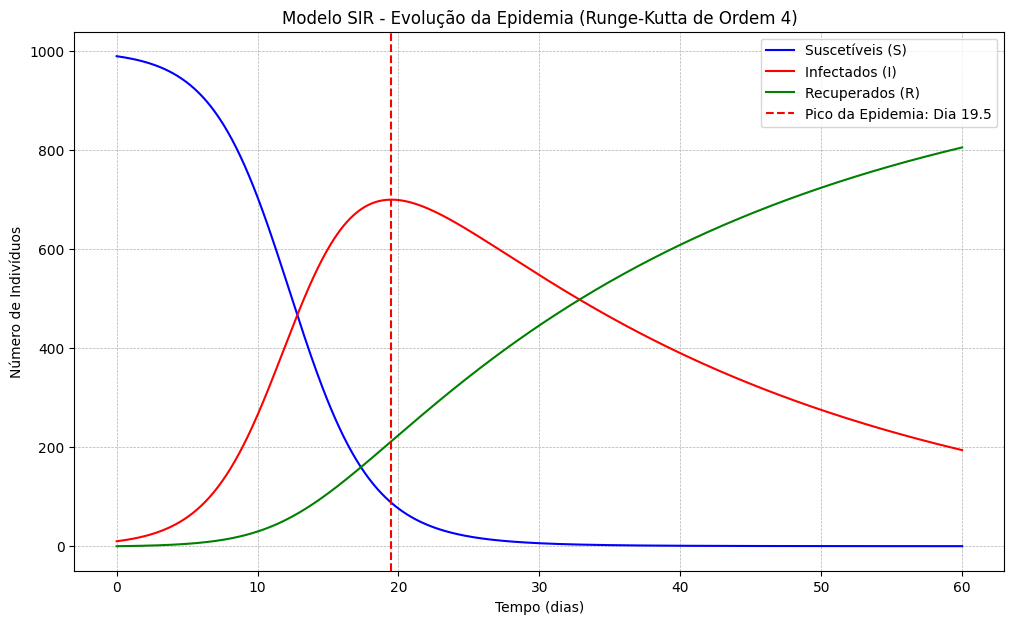

In [ ]:
# --- Geração do Gráfico ---
plt.figure(figsize=(12, 7))
plt.plot(t, S, label='Suscetíveis (S)', color='blue')
plt.plot(t, I, label='Infectados (I)', color='red')
plt.plot(t, R, label='Recuperados (R)', color='green')

# Adicionando uma linha vertical para marcar o pico da epidemia
plt.axvline(x=peak_time, color='red', linestyle='--',
            label=f'Pico da Epidemia: Dia {peak_time:.1f}')

# Adicionando anotações no gráfico para clareza
plt.title('Modelo SIR - Evolução da Epidemia (Runge-Kutta de Ordem 4)')
plt.xlabel('Tempo (dias)')
plt.ylabel('Número de Indivíduos')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

# Salva a figura em um arquivo
plt.savefig('sir_model_plot.png')

# --- Impressão dos Resultados e Interpretações ---
print("--- Análise da Simulação do Modelo SIR ---")
print(f"Parâmetros: β = {beta}, γ = {gamma}, População Total N = {N}")
print(f"Simulação por {t_max} dias com passo h = {h}\n")
# 1. Após quantos dias acontece o pico da epidemia?
# Resposta: O auge da epidemia ocorre aproximadamente no dia 19.5, com um máximo de 700 indivíduos infectados simultaneamente.
#No gráfico, este é o ponto mais alto da curva vermelha, marcado com a linha tracejada em vermelho.

# 2. Após quantos dias pode-se considerar que a epidemia está “controlada”?
# Resposta: A definição de "controlada" pode variar dependendo dos parâmetros e o tamanho da população.
#Se considerarmos o controle como o momento em que o número de infectados ativos se torna insignificante (por exemplo: menor que 1 indivíduo) após o pico,
#a simulação mostra que dentro do período de 60 dias, a epidemia estaria totalmente controlada segundo este critério. Embora a curva de infectados esteja em forte queda após o dia 19.5,
#enfim, é perceptível que não atingiu um valor próximo de zero ao final da simulação, mais sim uma estabilização da curva de infectados, levando a concluir que o surto está perto do fim, representando controle da epidemia já que o número de recuperados é maior do que infectados.
